##### This Jupyter Notebook is used to predict the number of goals scored by a striker or a winger in soccer based on various parameters such as age, height, current league, foot, goals in 2012/2013, goals in 2013/2014, etc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import tensorflow as tf
from tensorflow import keras
import sklearn
import scipy.stats as stats

C:\Users\shreyas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


##### Read data

In [2]:
# Read csv file
strikers_wingers = pd.read_csv('C:/Users/shreyas/Documents/Football Strikers/StrikerPerformance.csv')

In [3]:
strikers_wingers.head()

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,17/18 goals,17/18 minutes,age,current club,current league,foot,height,name,nationality,position
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,3.0,1194.0,26,Zenit St. Petersburg,Premier Liga,right,183.0,Dmitri Poloz,Russia,W
1,NaN,NaN,NaN,NaN,0.0,26.0,1.0,1255.0,6.0,48.0,...,6.0,1433.0,25,Zenit St. Petersburg,Premier Liga,both,180.0,Emiliano Rigoni,Argentina Italy,W
2,NaN,NaN,NaN,NaN,0.0,7.0,1.0,296.0,4.0,37.0,...,3.0,1571.0,22,Zenit St. Petersburg,Premier Liga,both,179.0,Sebastián Driussi,Argentina Italy,CF
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,19.0,2911.0,26,Zenit St. Petersburg,Premier Liga,right,183.0,Aleksandr Kokorin,Russia,CF
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,NaN,NaN,...,4.0,2019.0,26,Zenit St. Petersburg,Premier Liga,right,188.0,Anton Zabolotnyi,Russia,CF


##### Prepare data for processing

In [4]:
strikers_wingers_personal_info = strikers_wingers[['name','age','position','foot','height','current league','current club','nationality']]
strikers_wingers_match_info = strikers_wingers.drop(['name','age','position','foot','height','current league','current club', 'nationality'], axis=1)
strikers_wingers_info = pd.concat([strikers_wingers_personal_info, strikers_wingers_match_info], axis="columns")
strikers_wingers_info = strikers_wingers_info.dropna().reset_index().drop('index', axis=1)
strikers_wingers_info.head()

,name,age,position,foot,height,current league,current club,nationality,12/13 assists,12/13 games,...,15/16 goals,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,1.0,22.0,...,7.0,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0
1,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,5.0,26.0,...,8.0,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0
2,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname,11.0,42.0,...,18.0,2806.0,10.0,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0
3,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay,5.0,40.0,...,11.0,1794.0,0.0,22.0,2.0,804.0,5.0,25.0,6.0,1092.0
4,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil,9.0,32.0,...,6.0,1504.0,1.0,15.0,2.0,591.0,7.0,29.0,11.0,2513.0


##### Add fields to gain insights

In [5]:
strikers_wingers_info['total goals'] = strikers_wingers_info['12/13 goals'] + strikers_wingers_info['13/14 goals'] + strikers_wingers_info['14/15 goals'] + strikers_wingers_info['15/16 goals'] + strikers_wingers_info['16/17 goals']
strikers_wingers_info['total assists'] = strikers_wingers_info['12/13 assists'] + strikers_wingers_info['13/14 assists'] + strikers_wingers_info['14/15 assists'] + strikers_wingers_info['15/16 assists'] + strikers_wingers_info['16/17 assists']
strikers_wingers_info['total minutes'] = strikers_wingers_info['12/13 minutes'] + strikers_wingers_info['13/14 minutes'] + strikers_wingers_info['14/15 minutes'] + strikers_wingers_info['15/16 minutes'] + strikers_wingers_info['16/17 minutes']
strikers_wingers_info.head()

,name,age,position,foot,height,current league,current club,nationality,12/13 assists,12/13 games,...,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,total goals,total assists,total minutes
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,1.0,22.0,...,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,29.0,21.0,8956.0
1,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,5.0,26.0,...,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,51.0,31.0,11162.0
2,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname,11.0,42.0,...,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0,71.0,42.0,14187.0
3,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay,5.0,40.0,...,22.0,2.0,804.0,5.0,25.0,6.0,1092.0,26.0,10.0,8958.0
4,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil,9.0,32.0,...,15.0,2.0,591.0,7.0,29.0,11.0,2513.0,75.0,29.0,10351.0


##### Scatter plot to plot age vs goals scored by league

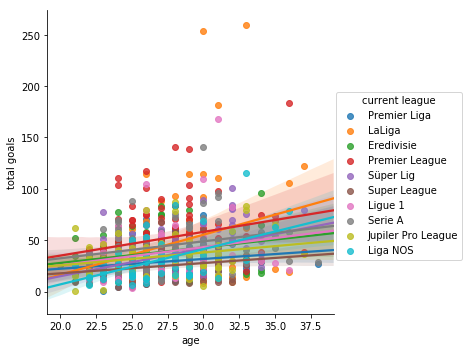

In [6]:
sns.lmplot(x='age', y='total goals', data=strikers_wingers_info, hue='current league')

##### Get top 10 goal scorers

In [7]:
top_10_goal_scorers = strikers_wingers_info[['name','current club','age','total goals']]
top_10_goal_scorers = top_10_goal_scorers.sort_values('total goals', ascending=False)
top_10_goal_scorers = top_10_goal_scorers.nlargest(10, 'total goals')
top_10_goal_scorers

,name,current club,age,total goals
60,Cristiano Ronaldo,Real Madrid,33,260.0
56,Lionel Messi,FC Barcelona,30,254.0
231,Zlatan Ibrahimovic,Manchester United,36,184.0
58,Luis Suárez,FC Barcelona,31,182.0
481,Edinson Cavani,Paris Saint-Germain,31,168.0
245,Pierre-Emerick Aubameyang,Arsenal FC,28,141.0
549,Gonzalo Higuaín,Juventus FC,30,141.0
226,Sergio Agüero,Manchester City,29,139.0
89,Aritz Aduriz,Athletic Bilbao,37,122.0
246,Alexandre Lacazette,Arsenal FC,26,117.0


##### Get a histogram of total goals scored by players

C:\Users\shreyas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


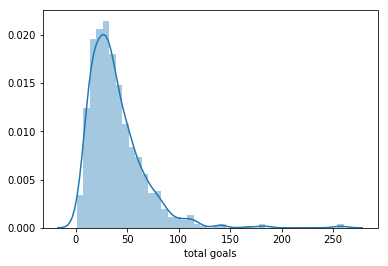

In [8]:
sns.distplot(strikers_wingers_info['total goals'])

##### Bar plot to visualize the number of players according to preferred foot from 2012 - 2018

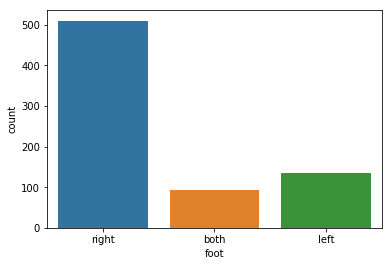

In [9]:
sns.countplot(x='foot', data=strikers_wingers_info)

##### Average number of goals scored by a player according to preferred foot from 2012 - 2018

In [10]:
foot_goals = strikers_wingers_info[['foot','total goals']]
foot_goals = foot_goals.groupby('foot', as_index=False)
foot_goals = foot_goals.aggregate(np.mean)
foot_goals

,foot,total goals
0,both,42.212766
1,left,36.723881
2,right,39.152941


##### Perform Anova Test to check if means of goals scored differs accordig to foot 

In [11]:
left_goals = strikers_wingers_info[strikers_wingers_info['foot'] == 'left']['total goals']
right_goals = strikers_wingers_info[strikers_wingers_info['foot'] == 'right']['total goals']
both_goals = strikers_wingers_info[strikers_wingers_info['foot'] == 'both']['total goals']

stats.f_oneway(left_goals, right_goals, both_goals)

F_onewayResult(statistic=1.10777167353546, pvalue=0.3308449579552767)

##### From the above results we can see that the p-value > 0.05 and hence, we cannot reject the Null Hypothesis that the average goals cored is same for each foot

##### Average number of total goals scored and total minutes played in a particular league from 2012 - 2018

In [12]:
league_goals_mean = strikers_wingers_info[['current league','total goals', 'total minutes']]
league_goals_mean = league_goals_mean.groupby('current league', as_index = False)
league_goals_mean = league_goals_mean.aggregate(np.mean)
league_goals_mean

,current league,total goals,total minutes
0,Eredivisie,36.197183,8944.380282
1,Jupiler Pro League,34.354839,9446.451613
2,LaLiga,46.690722,10744.381443
3,Liga NOS,30.019231,8640.365385
4,Ligue 1,37.779412,9449.308824
5,Premier League,52.050505,12043.424242
6,Premier Liga,29.375000,8253.803571
7,Serie A,44.282051,10207.371795
8,Super League,25.354839,7663.306452
9,Süper Lig,39.505376,9641.279570


##### Get all strikers who scored more goals than their league average

In [13]:
top_strikers = pd.DataFrame(columns = strikers_wingers_info.columns.tolist())
for index,row in league_goals_mean.iterrows():
     top_strikers = pd.concat([top_strikers, strikers_wingers_info[(strikers_wingers_info['current league'] == row['current league']) & (strikers_wingers_info['total goals'] >= row['total goals'])]])

top_strikers = top_strikers.reset_index()
top_strikers = top_strikers[['name','current league','current club','total goals']]
top_strikers.head()

,name,current league,current club,total goals
0,Klaas-Jan Huntelaar,Eredivisie,Ajax Amsterdam,65.0
1,Gastón Pereiro,Eredivisie,PSV Eindhoven,37.0
2,Luuk de Jong,Eredivisie,PSV Eindhoven,75.0
3,Steven Berghuis,Eredivisie,Feyenoord Rotterdam,38.0
4,Nicolai Jörgensen,Eredivisie,Feyenoord Rotterdam,76.0


##### Bar plot to visualize the number of top strikers in a league

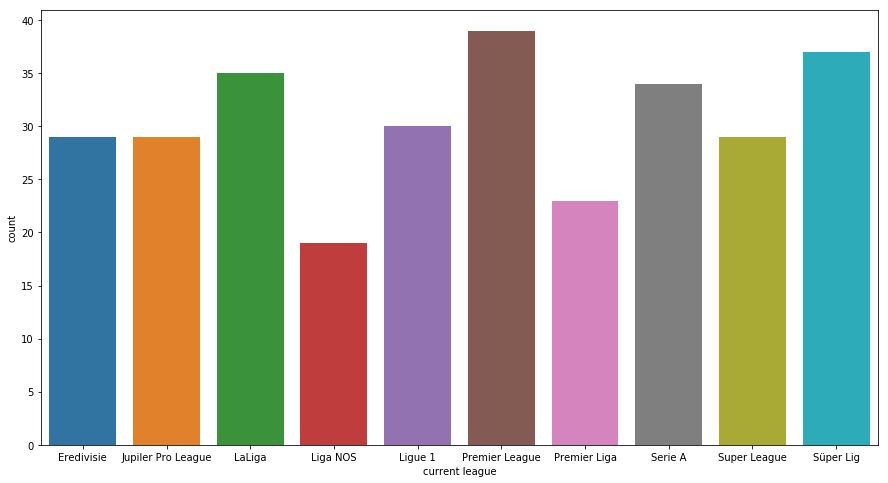

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='current league', data=top_strikers)

##### Apply one-hot encoding to help in regression and create train and target variable

In [15]:
strikers_wingers_ml = pd.get_dummies(strikers_wingers_info, columns=['position','foot','current league','current club'], prefix=['position','foot','current league','current club'])
strikers_wingers_ml.drop('name', axis=1, inplace=True)
strikers_wingers_ml.head()

goals = strikers_wingers_ml['17/18 goals']
strikers_wingers_ml.drop(['17/18 goals','nationality'], axis=1, inplace=True)

##### Create training and test model

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(strikers_wingers_ml, goals, test_size=0.3)

##### Perform standardization

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 

##### Create and fit Random Forest Regressor on Training Data

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, max_depth=7, min_samples_split=3, n_jobs=4, random_state=42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

##### Calculate Mean Absolute Error

In [19]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.02 degrees.


##### Calculate R-squared

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7549916774363294

##### Perform k-fold Cross Validation

In [21]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(rf, strikers_wingers_ml, goals, cv=11)
print(cv_results)
np.mean(cv_results)

[0.8513871  0.67797851 0.62483342 0.75334538 0.45000494 0.54632276
 0.67721161 0.76645827 0.69039204 0.53131934 0.79556366]


0.6695288215913991